## Neural Network Notebook for Object Classification with SDSS DR18

Within this notebook, we classify objects within SDSS DR18 using a neural network.

In [1]:
import kagglehub #used to get the data from kaggle.com
from kagglehub import KaggleDatasetAdapter #used to fetch the specific dataset from kaggle
import pandas as pd #used for viewing and manipulating the data
import matplotlib.pyplot as plt #used for data visulisation

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import sys, os #imports sys and os, allows for modifying the path to get functions
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), ".."))) #changes the path to include the py folder and its contents (parent folder)

from functions import * #calls all functions from functions.py

In [2]:
data = dataGrabber()

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


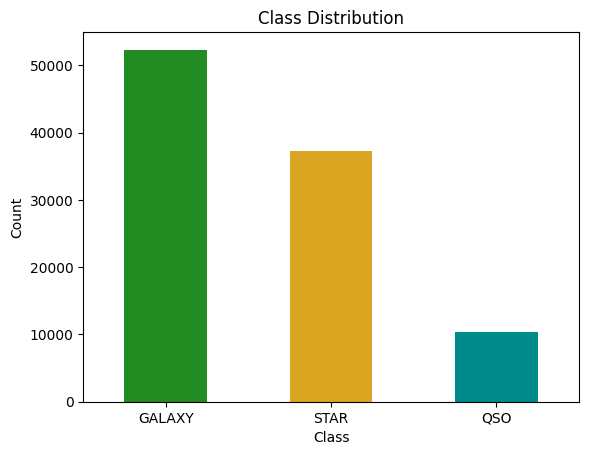

In [4]:
data['class'].value_counts().plot(kind='bar', color = ['forestgreen', 'goldenrod', 'darkcyan'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

In [5]:
features = ['u', 'g', 'r', 'i', 'z']

x = data[features]
y = data['class']

labelEncoder = LabelEncoder()
yEncoded = labelEncoder.fit_transform(y)

scaler = StandardScaler()
xScaled = scaler.fit_transform(x)

test_size = 0.2
random_state = 12
xTrain, xTest, yTrain, yTest = dataSplitting(xScaled, yEncoded, test_size, random_state)

xTrainTensor = torch.tensor(xTrain, dtype = torch.float32) 
yTrainTensor = torch.tensor(yTrain, dtype = torch.long) 
xTestTensor = torch.tensor(xTest, dtype = torch.float32) 
yTestTensor = torch.tensor(yTest, dtype = torch.long)

trainData = TensorDataset(xTrainTensor, yTrainTensor)
testData = TensorDataset(xTestTensor, yTestTensor)
trainLoader = DataLoader(trainData, batch_size = 64, shuffle = True)
testLoader =  DataLoader(testData, batch_size = 64, shuffle = False)

In [6]:
model = NeuralNetworkClassifier()

In [7]:
criteria = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters(), lr = 0.001)

epochs = 25
lossHistory = modelTraining(model, trainLoader, criteria, optimiser, epochs)

Epoch 1/25, loss = 0.602
Epoch 2/25, loss = 0.465
Epoch 3/25, loss = 0.439
Epoch 4/25, loss = 0.400
Epoch 5/25, loss = 0.386
Epoch 6/25, loss = 0.369
Epoch 7/25, loss = 0.330
Epoch 8/25, loss = 0.303
Epoch 9/25, loss = 0.272
Epoch 10/25, loss = 0.242
Epoch 11/25, loss = 0.223
Epoch 12/25, loss = 0.207
Epoch 13/25, loss = 0.193
Epoch 14/25, loss = 0.187
Epoch 15/25, loss = 0.181
Epoch 16/25, loss = 0.175
Epoch 17/25, loss = 0.173
Epoch 18/25, loss = 0.183
Epoch 19/25, loss = 0.169
Epoch 20/25, loss = 0.170
Epoch 21/25, loss = 0.168
Epoch 22/25, loss = 0.169
Epoch 23/25, loss = 0.168
Epoch 24/25, loss = 0.162
Epoch 25/25, loss = 0.161


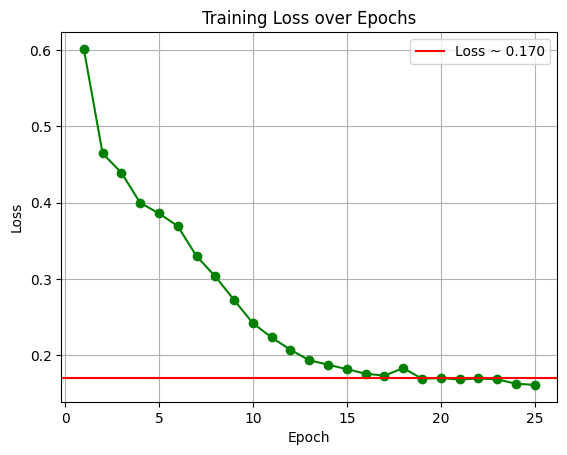

In [11]:
plt.plot(range(1, len(lossHistory) + 1), lossHistory, marker = 'o', color = 'g')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.axhline(y = 0.170, xmin = 0, xmax = epochs, linestyle= '-', color = 'r', label = "Loss ~ 0.170")
plt.legend()
plt.grid()
plt.show()

Accuracy Score: 0.96
Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.96      0.97     10428
         QSO       0.92      0.92      0.92      2068
        STAR       0.95      0.97      0.96      7504

    accuracy                           0.96     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.96      0.96      0.96     20000
 



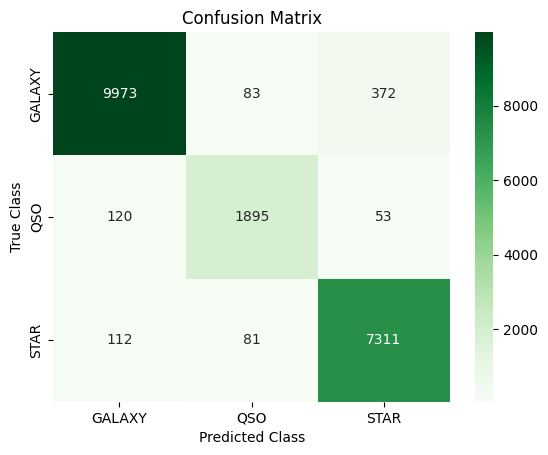

In [9]:
modelEvaluationNN(model, testLoader, labelEncoder)